In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [5]:
from __future__ import print_function, absolute_import

import matplotlib.pyplot as plt

In [18]:
# Let's first figure out the format of the gradients that I'll recieve.
import numpy as np

from traj.dircol import make_real_dircol_mp

prog, tree = make_real_dircol_mp(expmt="acrobot", seed=1776)
# J = prog.NewContinuousVariables(5, 1, 'J')
def constraint(x):
    for elem in x:
        print(elem.value(), elem.derivatives())
    return x
# prog.AddConstraint(constraint, -np.array([1]*5), np.array([1]*5), J)
prog.AddConstraint(constraint, -np.array([1]*5), np.array([1]*5), np.hstack((prog.input(0), prog.state(0))))

0.003 [1. 0. 0. 0. 0.]
0.0 [0. 1. 0. 0. 0.]
0.0 [0. 0. 1. 0. 0.]
0.0 [0. 0. 0. 1. 0.]
0.0 [0. 0. 0. 0. 1.]
0.00300016655816 [1. 0. 0. 0. 0.]
0.0 [0. 1. 0. 0. 0.]
0.0 [0. 0. 1. 0. 0.]
0.0 [0. 0. 0. 1. 0.]
0.0 [0. 0. 0. 0. 1.]
-0.068342740989 [1. 0. 0. 0. 0.]
0.0 [0. 1. 0. 0. 0.]
0.0 [0. 0. 1. 0. 0.]
0.0 [0. 0. 0. 1. 0.]
0.0 [0. 0. 0. 0. 1.]
-0.172622544685 [1. 0. 0. 0. 0.]
0.0 [0. 1. 0. 0. 0.]
0.0 [0. 0. 1. 0. 0.]
0.0 [0. 0. 0. 1. 0.]
0.0 [0. 0. 0. 0. 1.]
-0.172622544685 [1. 0. 0. 0. 0.]
0.0 [0. 1. 0. 0. 0.]
0.0 [0. 0. 1. 0. 0.]
0.0 [0. 0. 0. 1. 0.]
0.0 [0. 0. 0. 0. 1.]
-1.0 [1. 0. 0. 0. 0.]
0.0 [0. 1. 0. 0. 0.]
0.0 [0. 0. 1. 0. 0.]
0.0 [0. 0. 0. 1. 0.]
0.0 [0. 0. 0. 0. 1.]
-1.0 [1. 0. 0. 0. 0.]
0.0 [0. 1. 0. 0. 0.]
0.0 [0. 0. 1. 0. 0.]
0.0 [0. 0. 0. 1. 0.]
0.0 [0. 0. 0. 0. 1.]
-1.0 [1. 0. 0. 0. 0.]
0.0 [0. 1. 0. 0. 0.]
0.0 [0. 0. 1. 0. 0.]
0.0 [0. 0. 0. 1. 0.]
0.0 [0. 0. 0. 0. 1.]
-1.0 [1. 0. 0. 0. 0.]
0.0 [0. 1. 0. 0. 0.]
0.0 [0. 0. 1. 0. 0.]
0.0 [0. 0. 0. 1. 0.]
0.0 [0. 0. 0. 0. 1.]


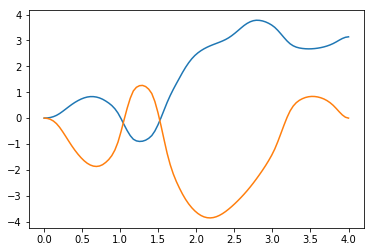

In [19]:
############################################################
# Run this cell to run the code!
############################################################

ret = prog.Solve()

x_trajectory = prog.ReconstructStateTrajectory()
breaks = np.linspace(x_trajectory.start_time(),x_trajectory.end_time(),100)
x_knots = np.hstack([x_trajectory.value(t) for t in breaks])

plt.plot(breaks, x_knots[0,:], breaks, x_knots[1,:])